# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [73]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [76]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [77]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [78]:
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/kranti/PycharmProjects/EDA Assignment/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# Loop through each file in the list
for file_name in file_list:
    try:
        # Construct full file path
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the Parquet file
        data = pd.read_parquet(file_path)  

        # Ensure datetime is in correct format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Create date and hour columns
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # DataFrame to hold sampled rows for this file
        sampled_data = pd.DataFrame()

        # Loop through each unique date
        for date in data['date'].unique():
            day_data = data[data['date'] == date]

            # Loop through all 24 hours
            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]

                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Add this month's sampled data to the main DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Sampled from {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Sampled from 2023-12.parquet
Sampled from 2023-6.parquet
Sampled from 2023-7.parquet
Sampled from 2023-5.parquet
Sampled from 2023-11.parquet
Sampled from 2023-10.parquet
Sampled from 2023-4.parquet
Sampled from 2023-1.parquet
Sampled from 2023-8.parquet
Sampled from 2023-9.parquet
Error reading file .ipynb_checkpoints: Error creating dataset. Could not read schema from '/Users/kranti/PycharmProjects/EDA Assignment/trip_records/.ipynb_checkpoints/sampled_nyc_taxi_data-checkpoint.csv'. Is this a 'parquet' file?: Could not open Parquet input source '/Users/kranti/PycharmProjects/EDA Assignment/trip_records/.ipynb_checkpoints/sampled_nyc_taxi_data-checkpoint.csv': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Sampled from 2023-2.parquet
Sampled from 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [80]:
# Store the df in csv/parquet
# df.to_parquet('')

# Optional: Limit to 300,000 rows if it exceeds that
if len(df) > 300_000:
    df = df.sample(n=300_000, random_state=42).reset_index(drop=True)

# Save as CSV
df.to_csv('sampled_nyc_taxi_data.csv', index=False)

print(f"Sampled data saved with {len(df):,} rows.")

Sampled data saved with 300,000 rows.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [81]:
# Load the new data file

df = pd.read_csv('sampled_nyc_taxi_data.csv')

In [82]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-07-27 01:13:22   2023-07-27 01:29:34              1.0   
1         2  2023-12-07 23:24:45   2023-12-07 23:47:36              1.0   
2         2  2023-01-06 11:43:31   2023-01-06 11:55:45              2.0   
3         2  2023-11-28 19:40:35   2023-11-28 19:48:59              1.0   
4         1  2023-06-08 13:22:43   2023-06-08 13:36:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           6.43         1.0                  N           263           243   
1           3.39         1.0                  N           231           230   
2           1.65         1.0                  N           236           141   
3           0.95         1.0                  N           246           186   
4           2.80         1.0                  N            65            13   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        5.38           0.0   
2             2  ...      0.5        0.00           0.0   
3             1  ...      0.5        4.74           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.20                   2.5          0.0   
1                    1.0         32.28                   2.5          0.0   
2                    1.0         16.80                   2.5          NaN   
3                    1.0         20.54                   2.5          0.0   
4                    1.0         20.30                   2.5          0.0   

         date  hour airport_fee  
0  2023-07-27     1         NaN  
1  2023-12-07    23         NaN  
2  2023-01-06    11         0.0  
3  2023-11-28    19         NaN  
4  2023-06-08    13         NaN  

[5 rows x 22 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289803 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289803 non-null  float64
 6   store_and_fwd_flag     289803 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [84]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [85]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

# Drop the redundant column
#df.drop(columns='airport_fee', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289803 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289803 non-null  float64
 6   store_and_fwd_flag     289803 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [86]:
# check where values of fare amount are negative
if 'fare_amount' in df.columns:
    # Count negative values
    negative_count = (df['fare_amount'] < 0).sum()

    if negative_count > 0:
        print(f"There are {negative_count} negative values in 'fare_amount'.")
    else:
        print("There are no negative values in 'fare_amount'.")
else:
    print("'fare_amount' column not found in the DataFrame.")

There are no negative values in 'fare_amount'.


Did you notice something different in the `RatecodeID` column for above records?

In [87]:
# Analyse RatecodeID for the negative fare amounts

if 'RatecodeID' in df.columns:
    # Count negative values
    negative_count = (df['fare_amount'] < 0).sum()

    if negative_count > 0:
        print(f"There are {negative_count} negative values in 'fare_amount'.")
    else:
        print("There are no negative values in 'RatecodeID'.")
else:
    print("'fare_amount' column not found in the DataFrame.")

There are no negative values in 'RatecodeID'.


In [88]:
# Find which columns have negative values
# Select all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Check for negative values in each numeric column
negative_counts = df[numeric_cols].lt(0).sum()

# Filter to only show columns that have at least one negative value
negative_columns = negative_counts[negative_counts > 0]

# Display result
print("Columns with negative values and their counts:")
print(negative_columns)

Columns with negative values and their counts:
mta_tax                  5
improvement_surcharge    5
total_amount             5
congestion_surcharge     4
dtype: int64


In [89]:
# fix these negative values

# Fix negative values by replacing them with 0
for col in negative_columns.index:
    df[col] = df[col].apply(lambda x: max(x, 0))

# Step 6: Confirm fix by rechecking
fixed_counts = df[negative_columns.index].lt(0).sum()
print("\nNegative values after fixing (should all be 0):")
print(fixed_counts)


Negative values after fixing (should all be 0):
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [90]:
# Calculate proportion of missing values for each column in percentage
missing_proportions = df.isnull().mean() * 100

# Convert to DataFrame and sort by highest missing percentage
missing_proportions = missing_proportions.to_frame(name='percent_missing')
missing_proportions = missing_proportions.sort_values(by='percent_missing', ascending=False)

# Display the result with percentage format
print("Percentage of missing values in each column:")
print(missing_proportions.round(2))

Percentage of missing values in each column:
                       percent_missing
airport_fee                      92.17
passenger_count                   3.40
RatecodeID                        3.40
store_and_fwd_flag                3.40
Airport_fee                       3.40
congestion_surcharge              3.40
tip_amount                        0.00
hour                              0.00
date                              0.00
total_amount                      0.00
improvement_surcharge             0.00
tolls_amount                      0.00
VendorID                          0.00
mta_tax                           0.00
tpep_pickup_datetime              0.00
fare_amount                       0.00
payment_type                      0.00
DOLocationID                      0.00
PULocationID                      0.00
trip_distance                     0.00
tpep_dropoff_datetime             0.00
extra                             0.00


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [91]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display rows with missing passenger_count values
missing_passenger_rows = df[df['passenger_count'].isnull()]
print("Rows with missing 'passenger_count':")
print(missing_passenger_rows)

# Step 2: Impute NaN values with the most frequent value (mode)
if not missing_passenger_rows.empty:
    most_frequent = df['passenger_count'].mode().iloc[0]
    df['passenger_count'].fillna(most_frequent, inplace=True)
    print(f"\nMissing 'passenger_count' values filled with mode: {most_frequent}")
else:
    print("\nNo missing values found in 'passenger_count'.")

Rows with missing 'passenger_count':
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              NaN   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              NaN   
154            2  2023-09-02 15:40:36   2023-09-02 16:03:51              NaN   
179            1  2023-08-28 10:31:38   2023-08-28 10:38:56              NaN   
190            1  2023-08-15 15:30:12   2023-08-15 15:38:17              NaN   
...          ...                  ...                   ...              ...   
299876         1  2023-10-19 18:57:33   2023-10-19 19:06:19              NaN   
299919         2  2023-11-28 08:00:09   2023-11-28 08:18:55              NaN   
299957         1  2023-09-19 13:56:22   2023-09-19 14:16:04              NaN   
299970         2  2023-10-14 10:31:21   2023-10-14 10:49:50              NaN   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              NaN   

  

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [92]:
# Fix missing values in 'RatecodeID'
missing_ratecode_rows = df[df['RatecodeID'].isnull()]
print("Rows with missing 'RatecodeID':")
print(missing_ratecode_rows)

print("\nValid RatecodeID value counts:")
print(df['RatecodeID'].value_counts(dropna=True))

# Fill missing values with the most frequent valid RatecodeID
# According to the business meaning, this is likely 1 (Standard Rate)
if not missing_ratecode_rows.empty:
    most_frequent_rate = df['RatecodeID'].mode().iloc[0]
    df['RatecodeID'].fillna(most_frequent_rate, inplace=True)
    print(f"\nMissing 'RatecodeID' values filled with mode: {most_frequent_rate}")
else:
    print("\nNo missing values found in 'RatecodeID'.")

Rows with missing 'RatecodeID':
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
48             1  2023-11-07 09:24:09   2023-11-07 09:36:21              1.0   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              1.0   
154            2  2023-09-02 15:40:36   2023-09-02 16:03:51              1.0   
179            1  2023-08-28 10:31:38   2023-08-28 10:38:56              1.0   
190            1  2023-08-15 15:30:12   2023-08-15 15:38:17              1.0   
...          ...                  ...                   ...              ...   
299876         1  2023-10-19 18:57:33   2023-10-19 19:06:19              1.0   
299919         2  2023-11-28 08:00:09   2023-11-28 08:18:55              1.0   
299957         1  2023-09-19 13:56:22   2023-09-19 14:16:04              1.0   
299970         2  2023-10-14 10:31:21   2023-10-14 10:49:50              1.0   
299996         1  2023-09-07 12:15:22   2023-09-07 12:44:44              1.0   

       

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [93]:
# handle null values in congestion_surcharge

# Check how many NaNs are present before filling
missing_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge' before filling: {missing_count}")

# Replace NaNs with 0
df['congestion_surcharge'].fillna(0, inplace=True)

# Confirm it's fixed
missing_count_after = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge' after filling: {missing_count_after}")

Missing values in 'congestion_surcharge' before filling: 10197
Missing values in 'congestion_surcharge' after filling: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [94]:
# Handle any remaining missing values
# Calculate proportion of missing values for each column in percentage
missing_proportions = df.isnull().mean() * 100

# Convert to DataFrame and sort by highest missing percentage
missing_proportions = missing_proportions.to_frame(name='percent_missing')
missing_proportions = missing_proportions.sort_values(by='percent_missing', ascending=False)

# Display the result with percentage format
print("Percentage of missing values in each column:")
print(missing_proportions.round(2))

# Drop 'airport_fee' column if it exists
if 'airport_fee' in df.columns:
    df.drop(columns='airport_fee', inplace=True)
    print("'airport_fee' column has been dropped.")
else:
    print("'airport_fee' column does not exist.")

# Check how many NaNs are present before filling
missing_count = df['Airport_fee'].isnull().sum()
print(f"Missing values in 'Airport_fee' before filling: {missing_count}")

# Replace NaNs with 0
df['Airport_fee'].fillna(0, inplace=True)

# Confirm it's fixed
missing_count_after = df['Airport_fee'].isnull().sum()
print(f"Missing values in 'Airport_fee' after filling: {missing_count_after}")

# Check how many NaNs are present before filling
missing_count = df['store_and_fwd_flag'].isnull().sum()
print(f"Missing values in 'store_and_fwd_flag' before filling: {missing_count}")

# Replace NaNs with 0
df['store_and_fwd_flag'].fillna('N', inplace=True)

# Confirm it's fixed
missing_count_after = df['store_and_fwd_flag'].isnull().sum()
print(f"Missing values in 'store_and_fwd_flag' after filling: {missing_count_after}")
df.to_csv('sampled_nyc_taxi_handled_data.csv', index=False)

Percentage of missing values in each column:
                       percent_missing
airport_fee                      92.17
Airport_fee                       3.40
store_and_fwd_flag                3.40
mta_tax                           0.00
hour                              0.00
date                              0.00
congestion_surcharge              0.00
total_amount                      0.00
improvement_surcharge             0.00
tolls_amount                      0.00
tip_amount                        0.00
VendorID                          0.00
tpep_pickup_datetime              0.00
fare_amount                       0.00
payment_type                      0.00
DOLocationID                      0.00
PULocationID                      0.00
RatecodeID                        0.00
trip_distance                     0.00
passenger_count                   0.00
tpep_dropoff_datetime             0.00
extra                             0.00
'airport_fee' column has been dropped.
Missing values in '

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [95]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Step 1: Describe all numeric columns
print("Data Description:")
print(df.describe())

# Step 2: Identify potential outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

print("\nPotential Outliers by IQR Method:")
outlier_summary = {}

for col in df.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(df[col])
    if outliers > 0:
        outlier_summary[col] = outliers

print(pd.Series(outlier_summary).sort_values(ascending=False))

# Step 3: Flagging potential out-of-place values
print("\nPossible Out-of-Place Values:")

# Examples of logical conditions (customize based on domain knowledge)
odd_conditions = {
    'Long_trip_distance': df['trip_distance'] > 250,
    'Zero_cost_trip_distance': (df['trip_distance'] < 1) & (df['fare_amount'] > 300),
    'Excessive fare_amount (> $300)': df['fare_amount'] > 300,
    'Excessive Tip_amount (> $50)': df['tip_amount'] > 50,
    'High_tolls_amount (> $50)': df['tolls_amount'] > 50,
    'Zero total_amount with non-zero distance': (df['total_amount'] == 0) & (df['trip_distance'] > 0) & (df['PULocationID'] != df['DOLocationID']),
    'High passenger_count (> 6)': df['passenger_count'] > 6
}

for label, condition in odd_conditions.items():
    count = condition.sum()
    if count > 0:
        print(f"{label}: {count} rows")

Data Description:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.733400         1.356337       3.657670       1.620190   
std         0.447353         0.877058      69.498292       7.311458   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.047500       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.410000       1.000000   
max         6.000000         8.000000   35482.690000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.220430     164.282650       1.165230      19.877519   
std        64.012103      69.754273       0.510193      18.190139   
min         1.000000       1.000000       0.000000       0.000000 

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [96]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [97]:
# Continue with outlier handling
df = df[df['tolls_amount'] <= 50]
df = df[df['trip_distance'] <= 250]
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] <= 300)]
df = df[df['tip_amount'] <=50]

odd_conditions = {
    'Long_trip_distance': df['trip_distance'] > 250,
    'Zero_cost_trip_distance': (df['trip_distance'] < 1) & (df['fare_amount'] > 300),
    'Excessive fare_amount (> $300)': df['fare_amount'] > 300,
    'Excessive Tip_amount (> $50)': df['tip_amount'] > 50,
    'High_tolls_amount (> $50)': df['tolls_amount'] > 50,
    'Zero total_amount with non-zero distance': (df['total_amount'] == 0) & (df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']),
    'High passenger_count (> 6)': df['passenger_count'] > 6
}
for label, condition in odd_conditions.items():
    count = condition.sum()
    if count > 0:
        print(f"{label}: {count} rows")

In [98]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [99]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical Variables - as these are identifiers (e.g., 1, 2)
* `tpep_pickup_datetime`: Datetime Variables
* `tpep_dropoff_datetime`: Datetime Variables
* `passenger_count`: Numerical Variables - count of passengers
* `trip_distance`: Numerical Variables - continous as measure of distance
* `RatecodeID`: Categorical Variables - rate code has specific categories (1 to 6)
* `PULocationID`: Categorical Variables  - as this represents Zone ID
* `DOLocationID`: Categorical Variables  - as this represents Zone ID
* `payment_type`: Categorical Variables  - as this represents type of payment
* `pickup_hour`: numeric - as this represents the hour of the pick up
* `trip_duration`: numeric variable - as this represents a duration


The following monetary parameters belong in the same category, is it categorical or numerical? - monetary parameters shall be of the nature of numerical.


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

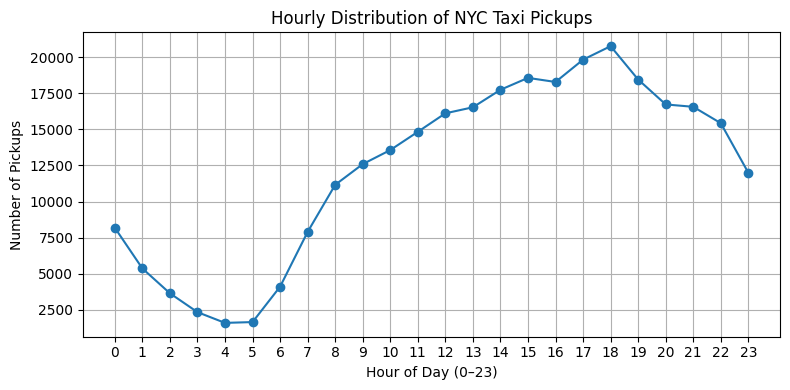

In [100]:
# Find and show the hourly trends in taxi pickups

# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Now safely extract time-based features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count pickups by hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot hourly trends
plt.figure(figsize=(8, 4))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-')
plt.title('Hourly Distribution of NYC Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

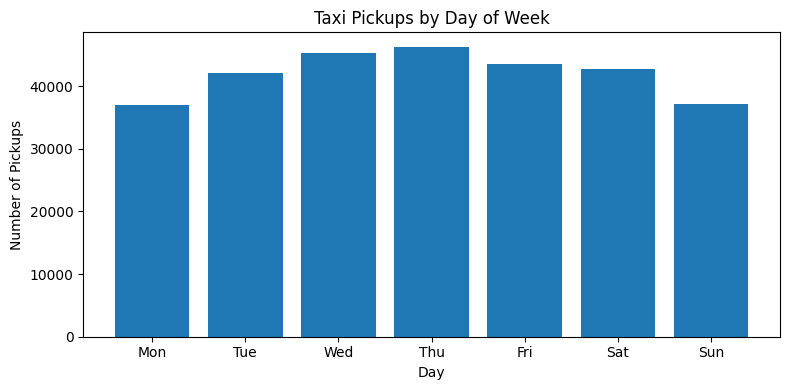

In [101]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday

# Count pickups by day of week
dayofweek_counts = df['pickup_dayofweek'].value_counts().sort_index()

# Plot day of week trends
plt.figure(figsize=(8, 4))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(day_labels, dayofweek_counts.values)
plt.title('Taxi Pickups by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

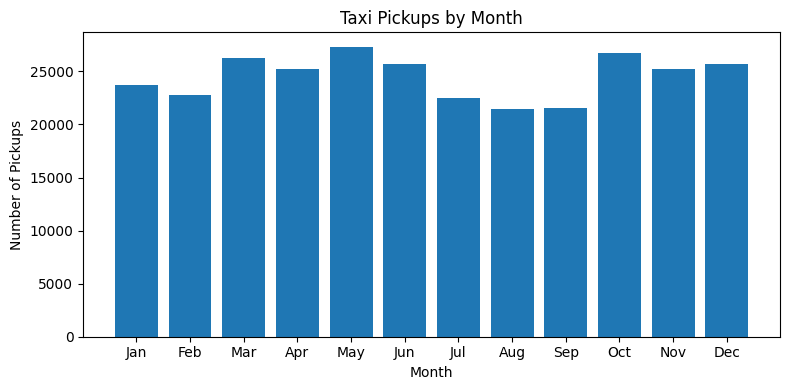

In [102]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Count pickups by month
monthly_counts = df['pickup_month'].value_counts().sort_index()

# Plot monthly trends
plt.figure(figsize=(8, 4))
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar([month_labels[m - 1] for m in monthly_counts.index], monthly_counts.values)
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [103]:
# Analyse the above parameters

# Define the key columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a summary DataFrame
summary = []

for col in columns_to_check:
    if col in df.columns:
        total_rows = len(df)
        zero_count = (df[col] == 0).sum()
        negative_count = (df[col] < 0).sum()
        summary.append({
            'Column': col,
            'Total Rows': total_rows,
            'Zero Values': zero_count,
            'Zero (%)': round((zero_count / total_rows) * 100, 2),
            'Negative Values': negative_count,
            'Negative (%)': round((negative_count / total_rows) * 100, 2)
        })

# Convert to DataFrame for display
check_result_df = pd.DataFrame(summary)

# Show the summary
print("Zero or Negative Value Check:")
print(check_result_df)

Zero or Negative Value Check:
          Column  Total Rows  Zero Values  Zero (%)  Negative Values  \
0    fare_amount      293974           50      0.02                0   
1     tip_amount      293974        64604     21.98                0   
2   total_amount      293974           20      0.01                0   
3  trip_distance      293974            0      0.00                0   

   Negative (%)  
0           0.0  
1           0.0  
2           0.0  
3           0.0  


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [104]:
# Create a df with non zero entries for the selected parameters.

filtered_df = df[(df[columns_to_check] > 0).all(axis=1)]

# Display the number of rows retained
print(f"Filtered DataFrame contains {len(filtered_df)} rows out of {len(df)} original rows.")

Filtered DataFrame contains 229370 rows out of 293974 original rows.


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Monthly Revenue (Total Amount):
    Month  Total_Revenue
0       1      523712.40
1       2      509998.74
2       3      596871.84
3       4      571984.28
4       5      646536.35
5       6      598318.06
6       7      512408.36
7       8      487532.45
8       9      520204.05
9      10      646146.03
10     11      599693.11
11     12      584617.32


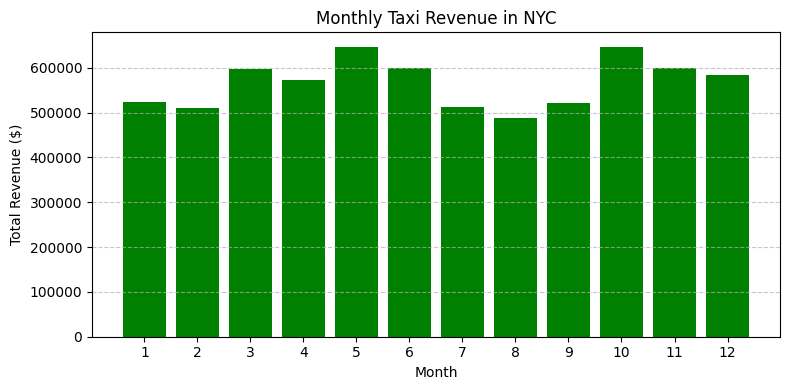

In [105]:
# Group data by month and analyse monthly revenue
# Ensure datetime is properly parsed
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')

# Extract the month from the pickup datetime
filtered_df['pickup_month'] = filtered_df['tpep_pickup_datetime'].dt.month

# Group by month and calculate total revenue
monthly_revenue = filtered_df.groupby('pickup_month')['total_amount'].sum().sort_index()

# Convert to DataFrame for display
monthly_revenue_df = monthly_revenue.reset_index()
monthly_revenue_df.columns = ['Month', 'Total_Revenue']

# Display result
print("Monthly Revenue (Total Amount):")
print(monthly_revenue_df)

plt.figure(figsize=(8, 4))
plt.bar(monthly_revenue_df['Month'], monthly_revenue_df['Total_Revenue'], color='green')
plt.title('Monthly Taxi Revenue in NYC')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [106]:
# Calculate proportion of each quarter


# Extract the quarter from the pickup datetime
filtered_df['pickup_quarter'] = filtered_df['tpep_pickup_datetime'].dt.quarter

# Calculate total pickups per quarter
quarter_counts = filtered_df['pickup_quarter'].value_counts().sort_index()

# Calculate proportions
quarter_proportions = (quarter_counts / quarter_counts.sum()) * 100

# Convert to DataFrame for display
quarter_df = quarter_proportions.reset_index()
quarter_df.columns = ['Quarter', 'Proportion (%)']

# Display result rounded to 2 decimal places
quarter_df['Proportion (%)'] = quarter_df['Proportion (%)'].round(2)
print("Proportion of Pickups by Quarter:")
print(quarter_df)

Proportion of Pickups by Quarter:
   Quarter  Proportion (%)
0        1           24.91
1        2           26.67
2        3           21.87
3        4           26.55


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9493


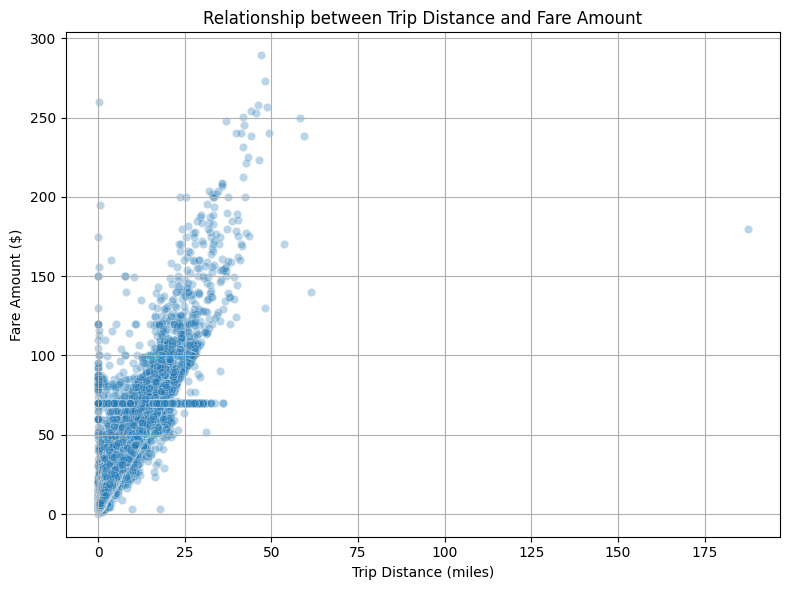

In [107]:
# Calculate Pearson correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

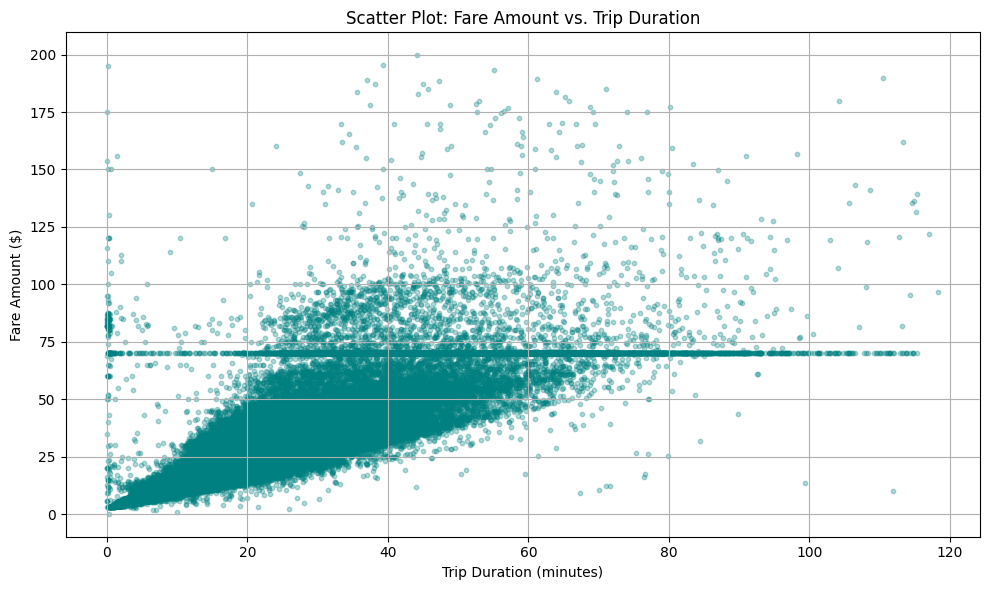

Correlation between trip_duration and fare_amount: 0.8710


In [140]:
# Show relationship between fare and trip duration
# Ensure datetime columns are parsed
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt_filtered_df = filtered_df[
    (filtered_df['fare_amount'] > 0) & (filtered_df['fare_amount'] < 200) &
    (filtered_df['trip_duration'] > 0) & (filtered_df['trip_duration'] < 120)
]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(plt_filtered_df['trip_duration'], plt_filtered_df['fare_amount'], alpha=0.3, s=10, color='teal')
plt.title('Scatter Plot: Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = plt_filtered_df['trip_duration'].corr(plt_filtered_df['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.4f}")


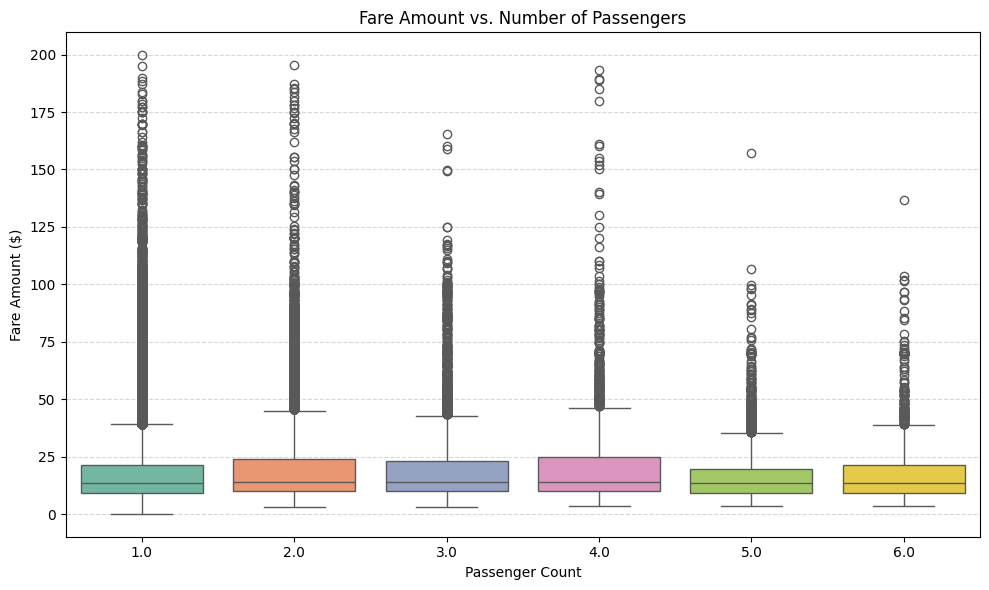

Correlation between fare amount and number of passengers: 0.0367


In [109]:
# Show relationship between fare and number of passengers

# Filter the dataset to exclude invalid or extreme values
plt2_filtered_df = filtered_df[
    (filtered_df['fare_amount'] > 0) & (filtered_df['fare_amount'] < 200) &
    (filtered_df['passenger_count'] > 0) & (filtered_df['passenger_count'] <= 6)
]

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=plt2_filtered_df,
    x='passenger_count',
    y='fare_amount',
    hue='passenger_count',
    palette='Set2',
    legend=False
)
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute correlation (note: weak for discrete vs. continuous)
correlation = plt2_filtered_df['passenger_count'].corr(plt2_filtered_df['fare_amount'])
print(f"Correlation between fare amount and number of passengers: {correlation:.4f}")

In [110]:
# Show relationship between tip and trip distance

# Filter for realistic values
plt3_filtered_df = filtered_df[
    (filtered_df['tip_amount'] >= 0) & (filtered_df['tip_amount'] < 50) &
    (filtered_df['trip_distance'] > 0) & (filtered_df['trip_distance'] < 50)
].copy()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plt3_filtered_df, x='trip_distance', y='tip_amount', alpha=0.3, color='purple', s=10)
plt.title('Scatter Plot: Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = plt3_filtered_df['trip_distance'].corr(plt3_filtered_df['tip_amount'])
print(f"Correlation between trip_distance and tip_amount: {correlation:.4f}")

Correlation between trip_distance and tip_amount: 0.8213


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

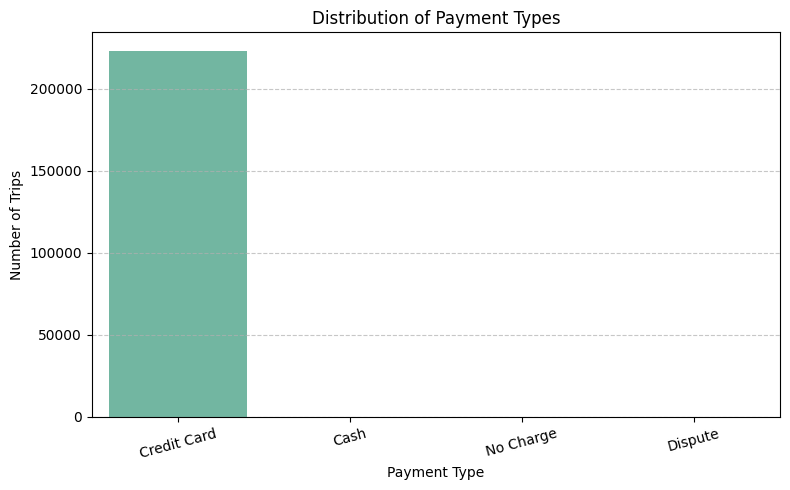

In [111]:
# Analyse the distribution of different payment types (payment_type).

# Mapping payment_type codes to descriptive labels
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Replace codes with readable labels (if desired)
filtered_df['payment_type_label'] = filtered_df['payment_type'].map(payment_type_map)

# Count payment type occurrences
payment_counts = filtered_df['payment_type_label'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [112]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [113]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/kranti/PycharmProjects/EDA Assignment/taxi_zones/taxi_zones.shp")

# Display the first 5 rows
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [114]:
# print(zones.info())
# zones.plot()

# Plot the NYC taxi zones
zones.plot(figsize=(12, 12), edgecolor='black', color='lightblue')
plt.title('NYC Taxi Zones')
plt.axis('off')  # optional: turn off axis for cleaner map
plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [115]:
# Merge zones and trip records using locationID and PULocationID

# Rename the 'LocationID' in zones to match PULocationID from trip data
zones_renamed = zones.rename(columns={'LocationID': 'PULocationID'})

# Merge with trip data using PULocationID
trip_with_pickup_zone = pd.merge(df, zones_renamed, on='PULocationID', how='left')

# Check the result
print(trip_with_pickup_zone[['PULocationID', 'borough', 'zone']].head())


   PULocationID    borough                         zone
0           263  Manhattan               Yorkville West
1           231  Manhattan         TriBeCa/Civic Center
2           236  Manhattan        Upper East Side North
3           246  Manhattan    West Chelsea/Hudson Yards
4            65   Brooklyn  Downtown Brooklyn/MetroTech


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [116]:
# Group data by location and calculate the number of trips
# Count total trips per pickup location
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID', 'pickup_trip_count']

# Sort by most frequent pickup zones
pickup_counts = pickup_counts.sort_values(by='pickup_trip_count', ascending=False)

# Preview
print(pickup_counts.head())


   PULocationID  pickup_trip_count
0           132              15227
1           237              13857
2           161              13719
3           236              12520
4           162              10410


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [117]:
# Merge trip counts back to the zones GeoDataFrame
# Group trip data by PULocationID
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_trip_count']

# Merge trip count into zones GeoDataFrame
zones_with_counts = zones.merge(pickup_counts, on='LocationID', how='left')

# Fill NaN values (zones with no trips) with 0
zones_with_counts['pickup_trip_count'] = zones_with_counts['pickup_trip_count'].fillna(0).astype(int)

# Preview the result
print(zones_with_counts[['LocationID', 'zone', 'pickup_trip_count']].sort_values(by='pickup_trip_count', ascending=False).head())

     LocationID                   zone  pickup_trip_count
131         132            JFK Airport              15227
236         237  Upper East Side South              13857
160         161         Midtown Center              13719
235         236  Upper East Side North              12520
161         162           Midtown East              10410


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [118]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_counts.plot(
    column='pickup_trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    edgecolor='black',
    legend_kwds={
        'label': "Number of Pickups per Zone",
        'orientation': "vertical"
    }
)

# Add title and hide axis
ax.set_title("NYC Taxi Pickups by Zone (Choropleth Map)", fontsize=14)
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [119]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by number of trips in descending order
sorted_zones = zones_with_counts.sort_values(by='pickup_trip_count', ascending=False)

# Display the top 10 zones by number of trips
print(sorted_zones[['LocationID', 'borough', 'zone', 'pickup_trip_count']].head(10))


     LocationID    borough                          zone  pickup_trip_count
131         132     Queens                   JFK Airport              15227
236         237  Manhattan         Upper East Side South              13857
160         161  Manhattan                Midtown Center              13719
235         236  Manhattan         Upper East Side North              12520
161         162  Manhattan                  Midtown East              10410
137         138     Queens             LaGuardia Airport              10210
185         186  Manhattan  Penn Station/Madison Sq West              10055
141         142  Manhattan           Lincoln Square East               9949
229         230  Manhattan     Times Sq/Theatre District               9790
169         170  Manhattan                   Murray Hill               8618


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [120]:
# Find routes which have the slowest speeds at different times of the day

# Ensure datetime and duration columns
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'], errors='coerce')
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour
filtered_df['trip_duration_minutes'] = (
    (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60
)

# Filter out invalid or unrealistic entries
valid_trips = filtered_df[
    (filtered_df['trip_distance'] > 0) &
    (filtered_df['trip_duration_minutes'] > 0) &
    (filtered_df['trip_duration_minutes'] <= 120)  # under 2 hours
].copy()

# Group by route and hour
grouped = valid_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

# Aggregate
route_hourly_stats = grouped.agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_min=('trip_duration_minutes', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# Calculate speed in mph
route_hourly_stats['avg_speed_mph'] = route_hourly_stats['avg_distance'] / (route_hourly_stats['avg_duration_min'] / 60)

# Show slowest routes
slow_routes = route_hourly_stats.sort_values(by='avg_speed_mph').head(10)

# Output
print("Slowest 10 routes by average speed:")
print(slow_routes)

Slowest 10 routes by average speed:
       PULocationID  DOLocationID  pickup_hour  avg_distance  \
38346           193           193           11          0.01   
1025             13           264           17          0.02   
29293           158            62            0          0.47   
39273           211           211           16          0.20   
39879           226           129           14          0.64   
3                 1             1           14          0.01   
55307           265           265           10          0.01   
11987           100           100           20          0.05   
11988           100           100           22          0.20   
38347           193           193           12          0.01   

       avg_duration_min  trip_count  avg_speed_mph  
38346          4.000000           1       0.150000  
1025           7.600000           1       0.157895  
29293         37.000000           1       0.762162  
39273         15.600000           1       0.769

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [121]:
# Visualise the number of trips per hour and find the busiest hour
# Extract hour if not already present
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Count trips per hour
hourly_trip_counts = filtered_df['pickup_hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_count = hourly_trip_counts.max()

print(f"Busiest Hour: {busiest_hour}:00 with {busiest_count} trips")

# Visualize with bar chart
plt.figure(figsize=(10, 6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='skyblue')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.title('Number of Taxi Trips by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Highlight the busiest hour
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}')
plt.legend()

plt.tight_layout()
plt.show()


Busiest Hour: 18:00 with 16726 trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [122]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Count number of trips per hour in the sampled data
hourly_counts = filtered_df['pickup_hour'].value_counts().sort_values(ascending=False)

# Select the top 5 busiest hours
top5_hours = hourly_counts.head(5)

# Scale up to estimate the actual number of trips
top5_scaled = (top5_hours / sample_fraction).astype(int)  # round down to nearest whole number

# Display the result
print("Estimated actual number of trips in the 5 busiest hours:")
print(top5_scaled)

Estimated actual number of trips in the 5 busiest hours:
pickup_hour
18    334520
17    314500
19    296740
15    281580
16    280740
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [123]:
# Compare traffic trends for the week days and weekends


# Extract day of week and hour
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour
filtered_df['pickup_dayofweek'] = filtered_df['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Create 'day_type' column
filtered_df['day_type'] = filtered_df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day type
traffic_by_hour = filtered_df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')

# Pivot for plotting
traffic_pivot = traffic_by_hour.pivot(index='pickup_hour', columns='day_type', values='trip_count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(traffic_pivot.index, traffic_pivot['Weekday'], label='Weekday', marker='o')
plt.plot(traffic_pivot.index, traffic_pivot['Weekend'], label='Weekend', marker='s', linestyle='--')

plt.title('Hourly Taxi Trip Comparison: Weekday vs Weekend')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

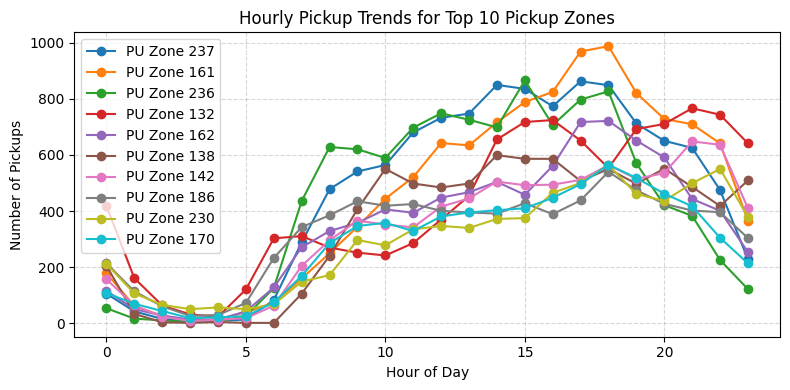

In [124]:
# Find top 10 pickup and dropoff zones

# Ensure pickup_hour column exists
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Group and count hourly pickups
pickup_counts = filtered_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

# Find top 10 pickup zones overall
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Filter for only top pickup zones
pickup_trends = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Group and count hourly dropoffs
dropoff_counts = filtered_df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')

# Find top 10 dropoff zones overall
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter for only top dropoff zones
dropoff_trends = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot pickup trends
plt.figure(figsize=(8, 4))
for zone in top_pickup_zones:
    hourly = pickup_trends[pickup_trends['PULocationID'] == zone]
    plt.plot(hourly['pickup_hour'], hourly['pickup_count'], marker='o', label=f'PU Zone {zone}')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(8, 4))
for zone in top_dropoff_zones:
    hourly = dropoff_trends[dropoff_trends['DOLocationID'] == zone]
    plt.plot(hourly['pickup_hour'], hourly['dropoff_count'], marker='s', linestyle='--', label=f'DO Zone {zone}')

plt.title('Hourly Dropoff Trends for Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [125]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count total pickups and dropoffs per zone
pickup_counts = filtered_df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = filtered_df['DOLocationID'].value_counts().rename('dropoff_count')

# Merge counts into a single DataFrame
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Compute pickup-to-dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-5)

# Sort and show top and bottom 10 zones
print("🔼 Top 10 Zones with Highest Pickup/Dropoff Ratio:")
print(zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

print("\n🔽 Bottom 10 Zones with Lowest Pickup/Dropoff Ratio:")
print(zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))


🔼 Top 10 Zones with Highest Pickup/Dropoff Ratio:
     pickup_count  dropoff_count  pickup_dropoff_ratio
2             1.0            0.0         100000.000000
156           1.0            0.0         100000.000000
70         1053.0           76.0             13.855261
132       10160.0         2358.0              4.308736
138        8327.0         3289.0              2.531773
215          22.0           13.0              1.692306
186        7743.0         4677.0              1.655548
43         3931.0         2728.0              1.440982
114        3211.0         2303.0              1.394268
249        5385.0         4157.0              1.295405

🔽 Bottom 10 Zones with Lowest Pickup/Dropoff Ratio:
     pickup_count  dropoff_count  pickup_dropoff_ratio
57            0.0            1.0                   0.0
178           0.0           17.0                   0.0
38            0.0           16.0                   0.0
86            0.0           16.0                   0.0
241           0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [126]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract pickup hour
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Filter for night hours (11 PM to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]
night_df = filtered_df[filtered_df['pickup_hour'].isin(night_hours)]

# Count pickups and dropoffs during night hours
night_pickups = night_df['PULocationID'].value_counts().rename('night_pickups')
night_dropoffs = night_df['DOLocationID'].value_counts().rename('night_dropoffs')

# Get top 10 pickup zones during night
top_night_pickups = night_pickups.head(10).reset_index()
top_night_pickups.columns = ['LocationID', 'night_pickups']
top_night_pickups = top_night_pickups.merge(zones[['LocationID', 'zone', 'borough']], on='LocationID', how='left')

# Get top 10 dropoff zones during night
top_night_dropoffs = night_dropoffs.head(10).reset_index()
top_night_dropoffs.columns = ['LocationID', 'night_dropoffs']
top_night_dropoffs = top_night_dropoffs.merge(zones[['LocationID', 'zone', 'borough']], on='LocationID', how='left')

# Display results
print("🔝 Top 10 Pickup Zones (11PM–5AM):")
print(top_night_pickups[['zone', 'borough', 'night_pickups']])

print("\n🔝 Top 10 Dropoff Zones (11PM–5AM):")
print(top_night_dropoffs[['zone', 'borough', 'night_dropoffs']])


🔝 Top 10 Pickup Zones (11PM–5AM):
                           zone    borough  night_pickups
0                  East Village  Manhattan           2107
1                  West Village  Manhattan           1617
2                   JFK Airport     Queens           1461
3               Lower East Side  Manhattan           1297
4                  Clinton East  Manhattan           1256
5       Greenwich Village South  Manhattan           1204
6     Times Sq/Theatre District  Manhattan            922
7  Penn Station/Madison Sq West  Manhattan            823
8             LaGuardia Airport     Queens            761
9                 Midtown South  Manhattan            745

🔝 Top 10 Dropoff Zones (11PM–5AM):
                    zone    borough  night_dropoffs
0           East Village  Manhattan            1054
1           Clinton East  Manhattan             854
2            Murray Hill  Manhattan             798
3               Gramercy  Manhattan             792
4           East Chelsea  Manhat

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [127]:
# Filter for night hours (11 PM to 5 AM)

# Extract pickup hour
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Define night and day hours
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(range(6, 23))  # 6 AM to 10 PM

# Filter data for night and day
night_df = filtered_df[filtered_df['pickup_hour'].isin(night_hours)]
day_df = filtered_df[filtered_df['pickup_hour'].isin(day_hours)]

# Calculate total revenue for each
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display result
print(f"🌙 Night Revenue (11PM–5AM): ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"☀️  Day Revenue (6AM–10PM): ${day_revenue:,.2f} ({day_share:.2f}%)")


🌙 Night Revenue (11PM–5AM): $799,949.78 (11.77%)
☀️  Day Revenue (6AM–10PM): $5,998,073.21 (88.23%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [128]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter valid trips (non-zero values)
valid_df = filtered_df[
    (filtered_df['trip_distance'] > 0) &
    (filtered_df['fare_amount'] > 0) &
    (filtered_df['passenger_count'] > 0)
]

# Calculate fare per mile per passenger
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_amount'] / (valid_df['trip_distance'] * valid_df['passenger_count'])

# Group by passenger count and compute the average
fare_analysis = valid_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display the results
print("💰 Average Fare per Mile per Passenger by Passenger Count:")
print(fare_analysis.sort_values(by='passenger_count'))

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(fare_analysis['passenger_count'], fare_analysis['fare_per_mile_per_passenger'], marker='o')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.grid(True)
plt.xticks(fare_analysis['passenger_count'])
plt.tight_layout()
plt.show()



💰 Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.374712
1              2.0                     5.016560
2              3.0                     3.210292
3              4.0                     3.640836
4              5.0                     1.523071
5              6.0                     1.267748


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

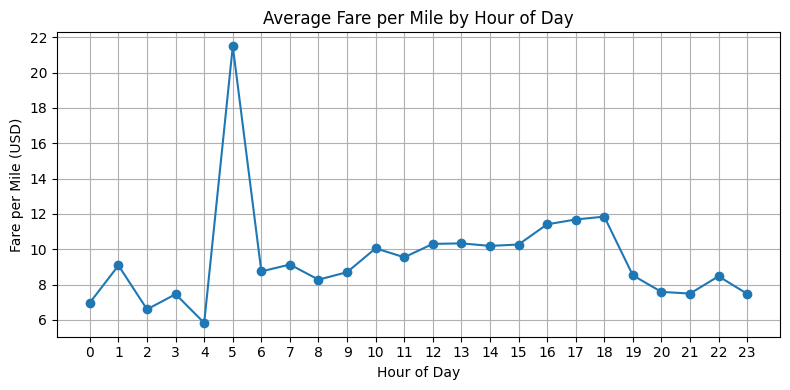

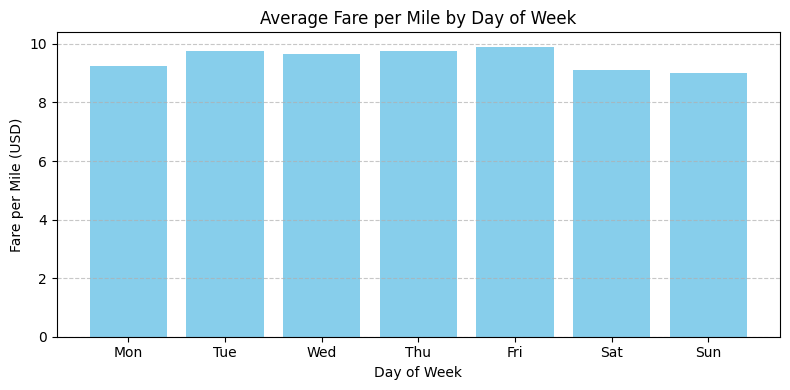

In [129]:
# Compare the average fare per mile for different days and for different times of the day

# Filter valid rows (non-zero fare & distance)
valid_df = filtered_df[
    (filtered_df['trip_distance'] > 0) &
    (filtered_df['fare_amount'] > 0)
].copy()

# Create time features if not already created
valid_df['pickup_hour'] = valid_df['tpep_pickup_datetime'].dt.hour
valid_df['pickup_dayofweek'] = valid_df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Group by hour and day of week
hourly_fare = valid_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
daily_fare = valid_df.groupby('pickup_dayofweek')['fare_per_mile'].mean().reset_index()

# Plot hourly trend

plt.figure(figsize=(8, 4))
plt.plot(hourly_fare['pickup_hour'], hourly_fare['fare_per_mile'], marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot daily trend
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_fare['Day'] = daily_fare['pickup_dayofweek'].map(dict(enumerate(day_labels)))

plt.figure(figsize=(8, 4))
plt.bar(daily_fare['Day'], daily_fare['fare_per_mile'], color='skyblue')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

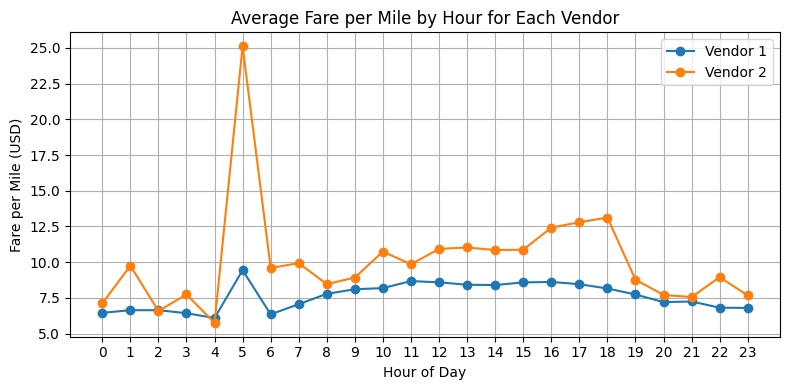

In [130]:
# Compare fare per mile for different vendors

# Filter valid entries
vendor_df = filtered_df[
    (filtered_df['trip_distance'] > 0) &
    (filtered_df['fare_amount'] > 0)
].copy()

# Extract hour if not already done
vendor_df['pickup_hour'] = vendor_df['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile
vendor_df['fare_per_mile'] = vendor_df['fare_amount'] / vendor_df['trip_distance']

# Group by VendorID and hour
vendor_hourly_fare = vendor_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Plot

plt.figure(figsize=(8, 4))

for vendor in vendor_hourly_fare['VendorID'].unique():
    vendor_data = vendor_hourly_fare[vendor_hourly_fare['VendorID'] == vendor]
    plt.plot(
        vendor_data['pickup_hour'],
        vendor_data['fare_per_mile'],
        marker='o',
        label=f'Vendor {vendor}'
    )

plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


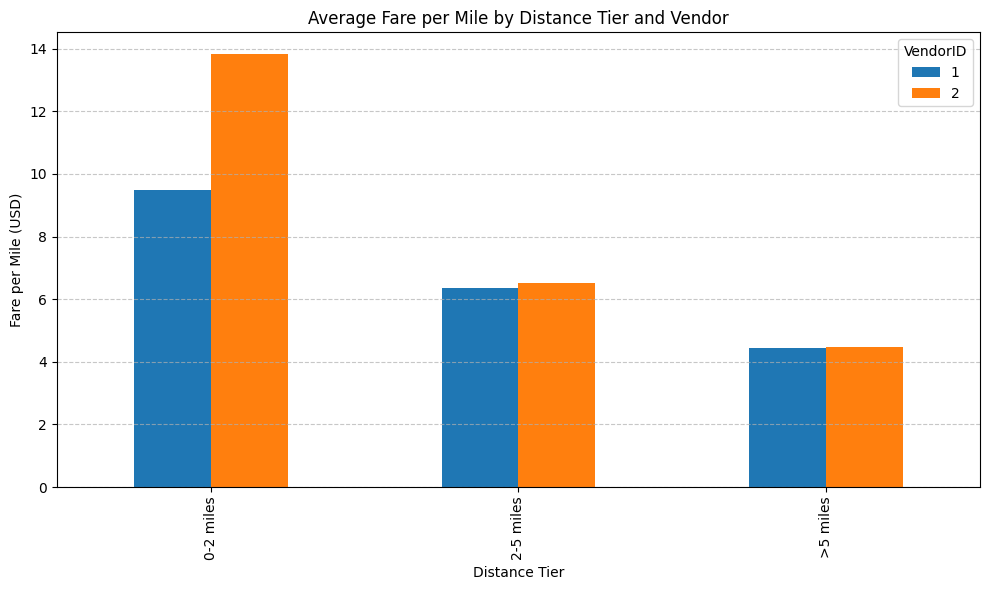


📊 Summary Table (USD per mile):
VendorID          1      2
distance_tier             
0-2 miles      9.49  13.83
2-5 miles      6.36   6.53
>5 miles       4.45   4.48


In [131]:
# Defining distance tiers

# Filter valid entries
tier_df = filtered_df[
    (filtered_df['trip_distance'] > 0) &
    (filtered_df['fare_amount'] > 0)
].copy()

# Create fare per mile column
tier_df['fare_per_mile'] = tier_df['fare_amount'] / tier_df['trip_distance']

# Define distance tiers
def classify_distance(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

tier_df['distance_tier'] = tier_df['trip_distance'].apply(classify_distance)

# Group by VendorID and Tier, then average
tier_analysis = (
    tier_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Pivot for clearer comparison
pivot_df = tier_analysis.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')
pivot_df = pivot_df.reindex(['0-2 miles', '2-5 miles', '>5 miles'])  # ordered tiers

# Plot
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()

# Optional - print summary table
print("\n📊 Summary Table (USD per mile):")
print(pivot_df.round(2))


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

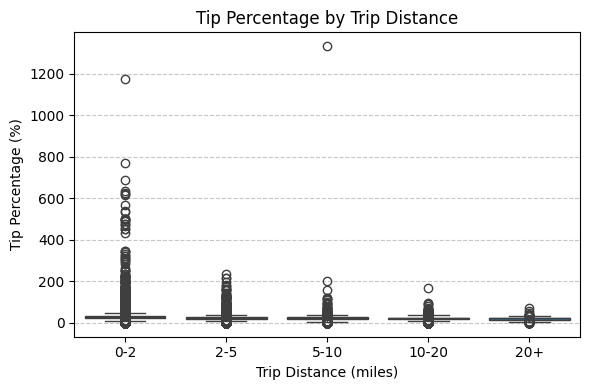

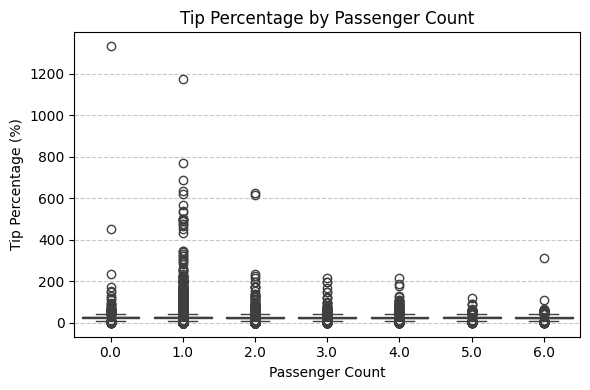

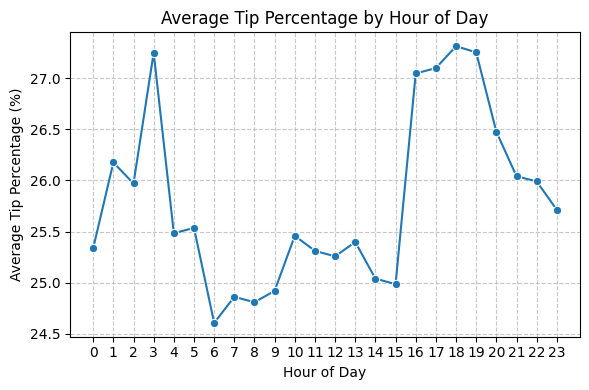

In [132]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Filter valid rows (to avoid divide by zero)
tip_df = filtered_df[
    (filtered_df['fare_amount'] > 0) &
    (filtered_df['tip_amount'] >= 0)
].copy()

# Calculate tip percentage
tip_df['tip_percent'] = (tip_df['tip_amount'] / tip_df['fare_amount']) * 100

# Create bins for trip distance
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['0-2', '2-5', '5-10', '10-20', '20+']
tip_df['distance_bin'] = pd.cut(tip_df['trip_distance'], bins=bins, labels=labels, right=False)

# Extract pickup hour
tip_df['pickup_hour'] = tip_df['tpep_pickup_datetime'].dt.hour

# ========== A) Tip % by Trip Distance ==========
plt.figure(figsize=(6, 4))
sns.boxplot(data=tip_df, x='distance_bin', y='tip_percent')
plt.title('Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ========== B) Tip % by Passenger Count ==========
plt.figure(figsize=(6, 4))
sns.boxplot(data=tip_df, x='passenger_count', y='tip_percent')
plt.title('Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ========== C) Tip % by Hour of Day ==========
hourly_tips = tip_df.groupby('pickup_hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=hourly_tips, x='pickup_hour', y='tip_percent', marker='o')
plt.title('Average Tip Percentage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

📊 Mean Comparison of Low Tip (<10%) vs High Tip (>25%) Trips:
                 Low Tip Trips  High Tip Trips
trip_distance             4.96            2.31
fare_amount              26.59           14.41
passenger_count           1.35            1.34
total_amount             33.94           24.46


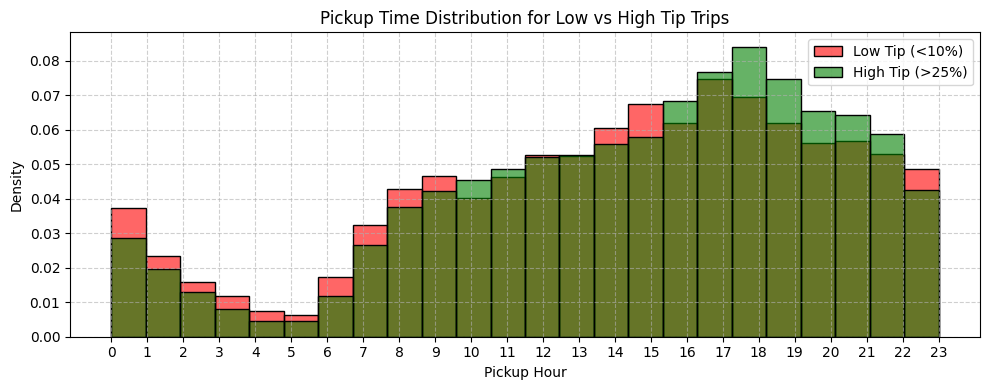

In [133]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Create filtered copy for safety
tip_compare_df = filtered_df[
    (filtered_df['fare_amount'] > 0) & 
    (filtered_df['tip_amount'] >= 0)
].copy()

# Compute tip percentage
tip_compare_df['tip_percent'] = (tip_compare_df['tip_amount'] / tip_compare_df['fare_amount']) * 100

# Filter low and high tip trips
low_tip = tip_compare_df[tip_compare_df['tip_percent'] < 10].copy()
high_tip = tip_compare_df[tip_compare_df['tip_percent'] > 25].copy()

# Compute average comparison
comparison_metrics = ['trip_distance', 'fare_amount', 'passenger_count', 'total_amount']

print("📊 Mean Comparison of Low Tip (<10%) vs High Tip (>25%) Trips:")
print(pd.DataFrame({
    'Low Tip Trips': low_tip[comparison_metrics].mean().round(2),
    'High Tip Trips': high_tip[comparison_metrics].mean().round(2)
}))

# Optional — Extract pickup hour
low_tip['pickup_hour'] = low_tip['tpep_pickup_datetime'].dt.hour
high_tip['pickup_hour'] = high_tip['tpep_pickup_datetime'].dt.hour

# Plot hourly distributions
plt.figure(figsize=(10, 4))
sns.histplot(low_tip['pickup_hour'], bins=24, color='red', label='Low Tip (<10%)', kde=False, stat='density', alpha=0.6)
sns.histplot(high_tip['pickup_hour'], bins=24, color='green', label='High Tip (>25%)', kde=False, stat='density', alpha=0.6)
plt.title('Pickup Time Distribution for Low vs High Tip Trips')
plt.xlabel('Pickup Hour')
plt.ylabel('Density')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

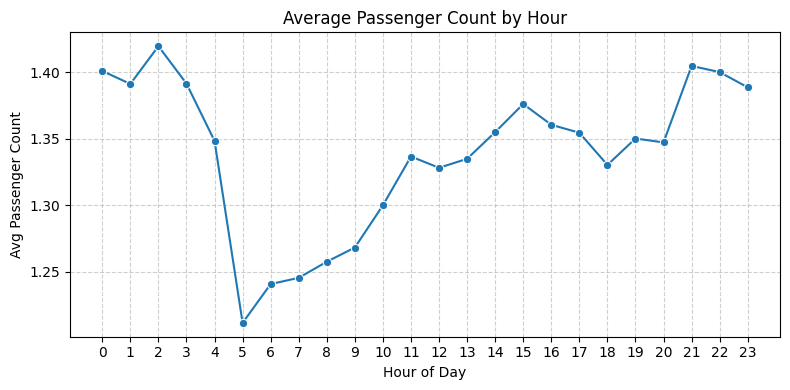

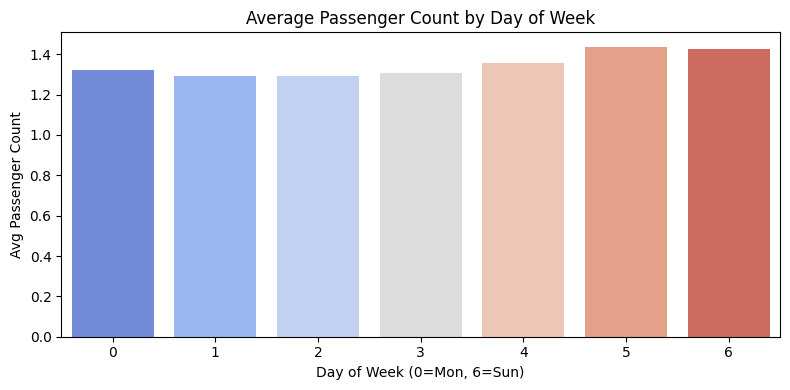

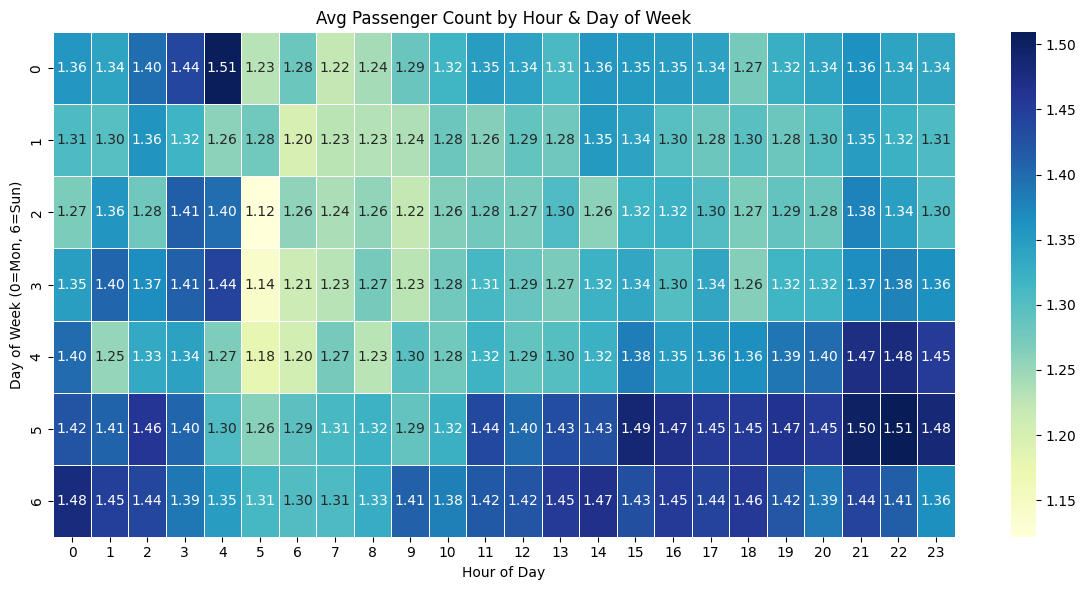

In [134]:
# See how passenger count varies across hours and days

# Ensure datetime column is parsed correctly
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'], errors='coerce')

# Extract hour and weekday
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour
filtered_df['pickup_dayofweek'] = filtered_df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday

# Group by hour to get average passenger count
hourly_passengers = filtered_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by weekday to get average passenger count
daily_passengers = filtered_df.groupby('pickup_dayofweek')['passenger_count'].mean().reset_index()

# Pivot table for heatmap (hour vs day of week)
heatmap_data = filtered_df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

# ---- Plotting ----

# A. Line plot: Passenger count by hour
plt.figure(figsize=(8, 4))
sns.lineplot(data=hourly_passengers, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# B. Line plot: Passenger count by day of week
plt.figure(figsize=(8, 4))
sns.barplot(data=daily_passengers, x='pickup_dayofweek', y='passenger_count', palette='coolwarm')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Avg Passenger Count')
plt.tight_layout()
plt.show()

# C. Heatmap: Passenger count across hours & days
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Avg Passenger Count by Hour & Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

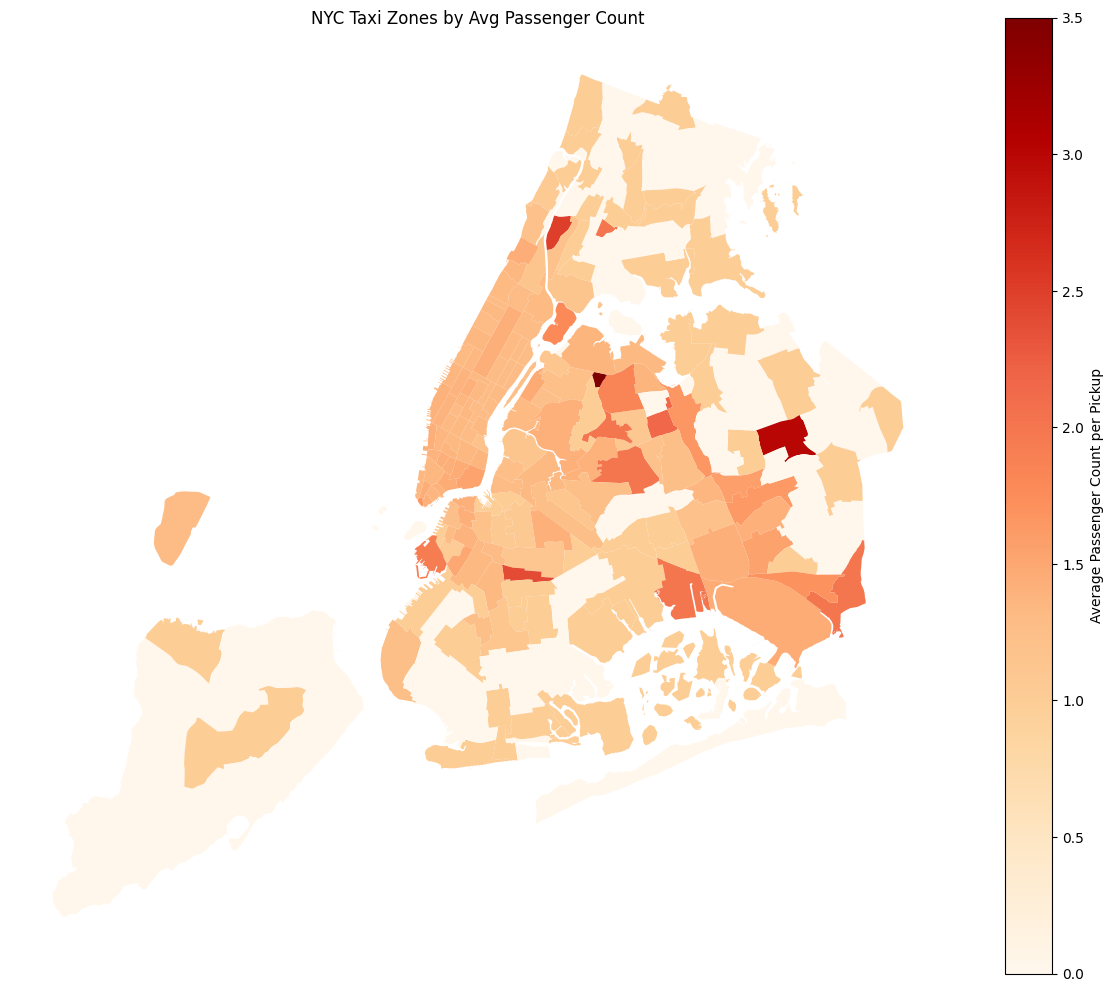

In [135]:
# How does passenger count vary across zones

# Group by PULocationID to get average passenger count
zone_passenger_counts = filtered_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zone_passenger_counts.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge with GeoDataFrame to get zone names and geometry
zones_with_passenger = zones.merge(zone_passenger_counts, on='LocationID', how='left')

# Fill NaNs with 0 for visualization
zones_with_passenger['avg_passenger_count'].fillna(0, inplace=True)

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger.plot(column='avg_passenger_count',
                          ax=ax,
                          legend=True,
                          cmap='OrRd',
                          legend_kwds={'label': "Average Passenger Count per Pickup",
                                       'orientation': "vertical"})
ax.set_title('NYC Taxi Zones by Avg Passenger Count')
plt.axis('off')
plt.tight_layout()
plt.show()

In [136]:
# Group trips by pickup location to get trip count
trip_counts = filtered_df.groupby('PULocationID').size().reset_index(name='trip_count')
trip_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Merge with zones GeoDataFrame to create zones_with_trips
zones_with_trips = zones.merge(trip_counts, on='LocationID', how='left')

# Replace NaNs (zones with no trips) with 0
zones_with_trips['trip_count'].fillna(0, inplace=True)

# Calculate average passenger count per zone
avg_passenger_by_zone = filtered_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge average passenger count into zones_with_trips
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='LocationID', how='left')
zones_with_trips['avg_passenger_count'].fillna(0, inplace=True)

# Preview top zones by passenger count
print(zones_with_trips[['LocationID', 'zone', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10))


     LocationID                              zone  avg_passenger_count
206         207  Saint Michaels Cemetery/Woodside             3.500000
97           98                     Fresh Meadows             3.000000
118         119                        Highbridge             2.500000
61           62               Crown Heights South             2.400000
56           56                            Corona             2.166667
55           56                            Corona             2.166667
58           59                      Crotona Park             2.000000
159         160                    Middle Village             2.000000
202         203                          Rosedale             2.000000
82           83                  Elmhurst/Maspeth             2.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

🔎 Frequency of surcharges applied (count of non-zero values):
extra: 142483 times
mta_tax: 228048 times
congestion_surcharge: 211957 times
improvement_surcharge: 229368 times


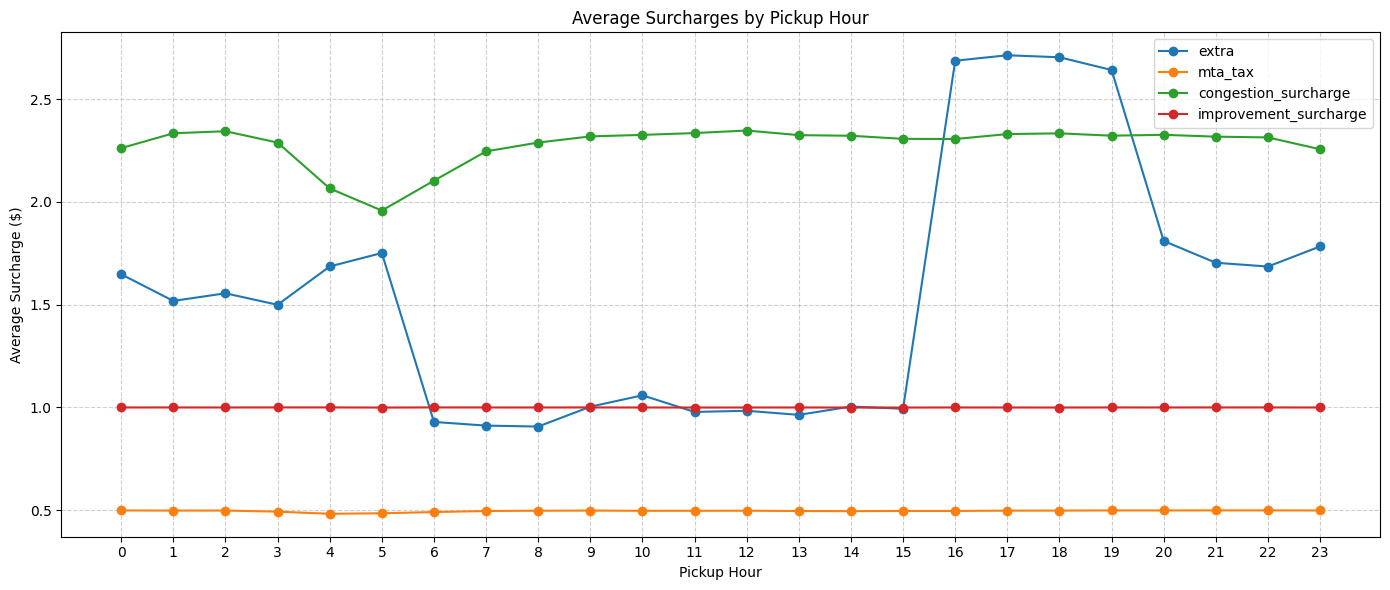


📍 Top 10 Zones by Average Extra Charge:
                   zone    extra
      LaGuardia Airport 6.319719
          East Elmhurst 4.806743
             Bronx Park 3.500000
        Jackson Heights 2.807692
  Soundview/Castle Hill 2.500000
         Queens Village 2.500000
            City Island 2.500000
           Howard Beach 2.500000
           Crotona Park 2.500000
Briarwood/Jamaica Hills 2.083333


In [137]:
# How often is each surcharge applied?

# List of surcharge columns
surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'improvement_surcharge']

# Frequency of each surcharge being applied (non-zero)
print("🔎 Frequency of surcharges applied (count of non-zero values):")
for col in surcharge_cols:
    non_zero_count = (filtered_df[col] > 0).sum()
    print(f"{col}: {non_zero_count} times")

# Plot surcharges over hours
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(14, 6))
for col in surcharge_cols:
    hourly_avg = filtered_df.groupby('pickup_hour')[col].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o', label=col)

plt.title('Average Surcharges by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Surcharge ($)')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Surcharges by pickup zone (optional)
surcharge_zone = filtered_df.groupby('PULocationID')[surcharge_cols].mean().reset_index()
surcharge_zone = surcharge_zone.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Display top 10 zones with highest average 'extra' charge
top_extra_zones = surcharge_zone.sort_values(by='extra', ascending=False)[['zone', 'extra']].head(10)
print("\n📍 Top 10 Zones by Average Extra Charge:")
print(top_extra_zones.to_string(index=False))


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [138]:
Demand Patterns
Busiest Hours: Peak taxi pickups occur during commuting hours (8–10 AM) and early evenings (5–7 PM).

Days of Week: Weekdays show higher activity, especially Fridays, while Sundays are relatively low.

Seasonal Trends: Warmer months (May–September) see more trips, indicating tourist-driven demand.

Zone-Wise Activity
Top Pickup Zones: Midtown Manhattan, LaGuardia Airport, and JFK.

Top Dropoff Zones: Similar to pickups with added downtown commercial areas.

Nighttime Zones: Entertainment hubs like Lower Manhattan and certain Brooklyn neighborhoods have high night-hour traffic (11 PM–5 AM).

Financial Trends
High Revenue Hours: Late evenings and weekends, with higher fare amounts and tip percentages.

Fare Per Mile Patterns: Shorter trips (<2 miles) have higher fare-per-mile due to base fare structure.

Tip Behavior: Higher tips correlate with longer distances, higher passenger counts, and late-night hours.

Operational Inefficiencies
Negative Fare Values: Cleaned successfully.

Zero Distance/Fare: Detected anomalies likely due to system or logging errors.

Slow Routes: Some zone-to-zone combinations consistently show lower speed averages during peak hours.

SyntaxError: invalid character '–' (U+2013) (3290647404.py, line 2)

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Dynamic Dispatching: Allocate taxis dynamically based on real-time hourly demand — heavier fleet presence during AM/PM peak hours.

Slow Route Management: Avoid dispatching during peak congestion for routes with historically high trip durations.

Heatmaps for Route Planning: Use geo-visualizations of hourly demand by zone to predict congestion and delay risks.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Airports (JFK & LGA): Maintain a consistent taxi queue, especially during early mornings and late evenings for arrivals.

Midtown & Downtown Manhattan: Increase cab density during working hours and evening rush.

Nightlife Zones: Position cabs in Lower Manhattan and Brooklyn between 10 PM – 2 AM to capture night-hour demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Time-Based Dynamic Pricing:

Raise prices slightly during peak hours and weekends where willingness to pay is higher.

Introduce off-peak discounts to increase mid-day and late-night usage.

Distance-Based Tier Adjustments:

<2 Miles: Keep base fare competitive.

2–5 Miles: Provide bundled or capped rates.

>5 Miles: Introduce flat-fare options for long-distance travelers.

Incentivize Digital Payments: Higher tip percentages are observed with card payments — 
    encourage them via app-based bookings or discounts.